Using matplotlib backend: Qt5Agg


ValueError: The passed save_path is not a valid checkpoint: /home/somin/Desktop/TIL/deep-learning-tensorflow-book-code/Ch12-DQN/model.ckpt

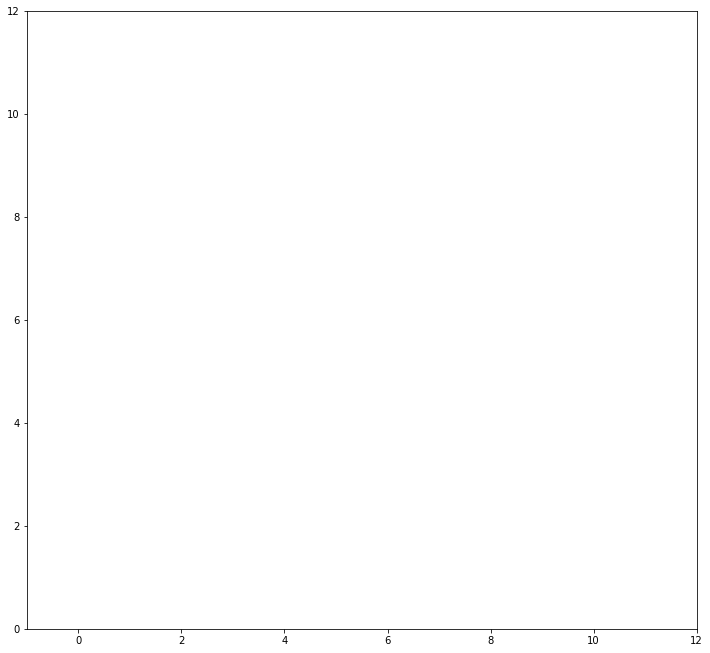

In [2]:
# -*- coding: utf-8 -*-

%matplotlib
%matplotlib inline

from train_catch_game import *
from IPython import display
import matplotlib.patches as patches
import pylab as pl
import time
import tensorflow as tf
import os


# 설정값들을 정의합니다.
gridSize = 10
maxGames = 30
env = CatchEnvironment(gridSize)
winCount = 0
loseCount = 0
numberOfGames = 0

# 화면을 그리기 위한 설정들을 정의합니다.
ground = 1
plot = pl.figure(figsize=(12,12))
axis = plot.add_subplot(111, aspect='equal')
axis.set_xlim([-1, 12])
axis.set_ylim([0, 12])

# 파라미터를 불러오기 위한 tf.train.Saver() class를 선언합니다.
saver = tf.train.Saver()

# 현재 상태를 그리기 위한 drawState 함수를 정의합니다.
def drawState(fruitRow, fruitColumn, basket, gridSize):
  # 과일이 몇번째 세로축에 있는지 정의합니다.
  fruitX = fruitColumn 
  # 과일이 몇번째 가로축에 있는지 정의합니다.
  fruitY = (gridSize - fruitRow + 1)
  # 승리 횟수, 패배 횟수, 전체 게임 횟수를 화면 상단에 출력합니다.
  statusTitle = "Wins: " + str(winCount) + "  Losses: " + str(loseCount) + "  TotalGame: " + str(numberOfGames)
  axis.set_title(statusTitle, fontsize=30)
  for p in [
    # 배경의 위치를 지정합니다.
    patches.Rectangle(
        ((ground - 1), (ground)), 11, 10,
        facecolor="#000000"      # Black
    ),
    # 바구니의 위치를 지정합니다.
    patches.Rectangle(
        (basket - 1, ground), 2, 0.5,
        facecolor="#FF0000"     # Red
    ),
    # 과일의 위치를 지정합니다.
    patches.Rectangle(
        (fruitX - 0.5, fruitY - 0.5), 1, 1,
        facecolor="#0000FF"       # Blue
    ),   
    ]:
      axis.add_patch(p)
  display.clear_output(wait=True)
  display.display(pl.gcf())


with tf.Session() as sess:    
  # 저장된 파라미터를 불러옵니다. 
  saver.restore(sess, os.getcwd()+"/model.ckpt")
  print('저장된 파라미터를 불러왔습니다!')

  # maxGames 횟수만큼 게임을 플레이합니다.
  while (numberOfGames < maxGames):
    numberOfGames = numberOfGames + 1
     
    # 최초의 상태를 정의합니다.
    isGameOver = False
    fruitRow, fruitColumn, basket = env.reset()
    currentState = env.observe()
    drawState(fruitRow, fruitColumn, basket, gridSize)

    while (isGameOver != True):
      # 현재 상태를 DQN의 입력값으로 넣고 구한 Q값중 가장 큰 Q값을 갖는 행동을 취합니다.
      q = sess.run(y_pred, feed_dict={x: currentState})
      action = q.argmax()

      # 행동을 취하고 다음 상태로 넘어갑니다.
      nextState, reward, gameOver, stateInfo = env.act(action)    
      fruitRow = stateInfo[0]
      fruitColumn = stateInfo[1]
      basket = stateInfo[2]
     
      # 과일을 받아내면 winCount를 1 늘리고 과일을 받아내지 못하면 loseCount를 1 늘립니다.
      if (reward == 1):
        winCount = winCount + 1
      elif (reward == -1):
        loseCount = loseCount + 1

      currentState = nextState
      isGameOver = gameOver
      drawState(fruitRow, fruitColumn, basket, gridSize)
      # 다음 행동을 취하기 전에 0.05초의 일시정지를 줍니다.
      time.sleep(0.05)

# 최종 출력결과 이미지를 하나로 정리합니다.
display.clear_output(wait=True)